In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_extraction import text

In [2]:
df = pd.read_csv('/Users/kyriakospapadopoulos/Downloads/Spotify-2000.csv')

In [3]:
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   1994 non-null   object
 1   Artist                  1994 non-null   object
 2   Top Genre               1994 non-null   object
 3   Year                    1994 non-null   int64 
 4   Beats Per Minute (BPM)  1994 non-null   int64 
 5   Energy                  1994 non-null   int64 
 6   Danceability            1994 non-null   int64 
 7   Loudness (dB)           1994 non-null   int64 
 8   Liveness                1994 non-null   int64 
 9   Valence                 1994 non-null   int64 
 10  Length (Duration)       1994 non-null   object
 11  Acousticness            1994 non-null   int64 
 12  Speechiness             1994 non-null   int64 
 13  Popularity              1994 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 218.2+ KB


In [5]:
df.drop(labels=["Index"], axis=1, inplace=True)

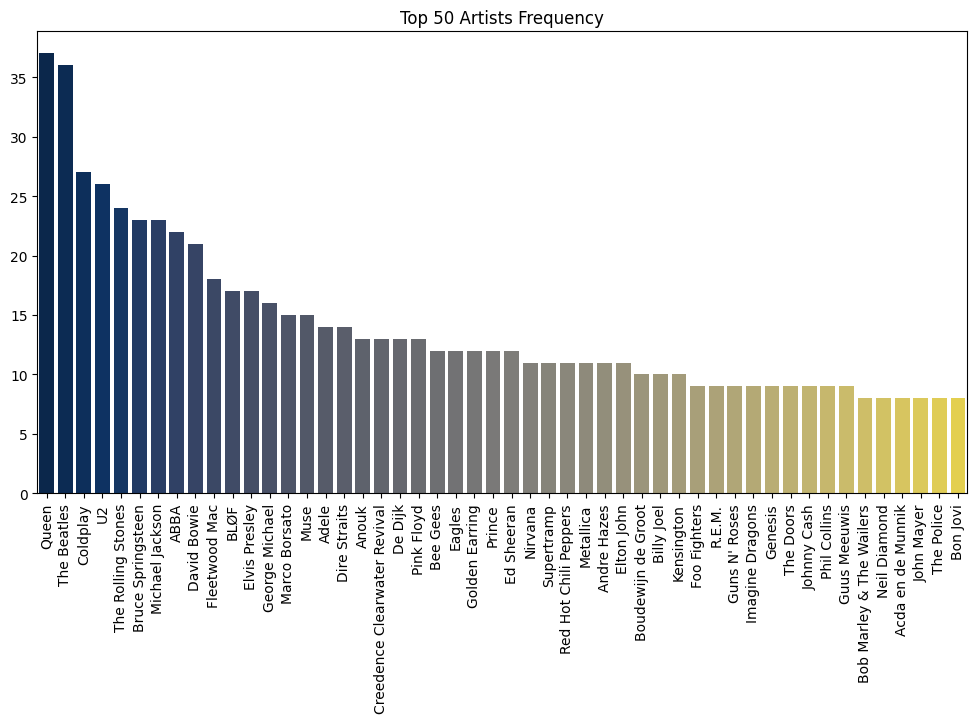

In [7]:
artist_counts = df['Artist'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=artist_counts.head(50).index, y=artist_counts.head(50).values , palette = 'cividis')
plt.title('Top 50 Artists Frequency')
plt.xticks(rotation=90)
plt.show()

In [8]:
df["Top Genre"].nunique()

149

In [9]:
genre_counts = df['Top Genre'].value_counts()
df['Top Genre'] = df['Top Genre'].map(genre_counts)
df['Length (Duration)']=df['Length (Duration)'].str.replace(',', '').astype(int)

In [10]:
df.head()

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,Sunrise,Norah Jones,123,2004,157,30,53,-14,11,68,201,94,3,71
1,Black Night,Deep Purple,413,2000,135,79,50,-11,17,81,207,17,7,39
2,Clint Eastwood,Gorillaz,2,2001,168,69,66,-9,7,52,341,2,17,69
3,The Pretender,Foo Fighters,70,2007,173,96,43,-4,3,37,269,0,4,76
4,Waitin' On A Sunny Day,Bruce Springsteen,51,2002,106,82,58,-5,10,87,256,1,3,59


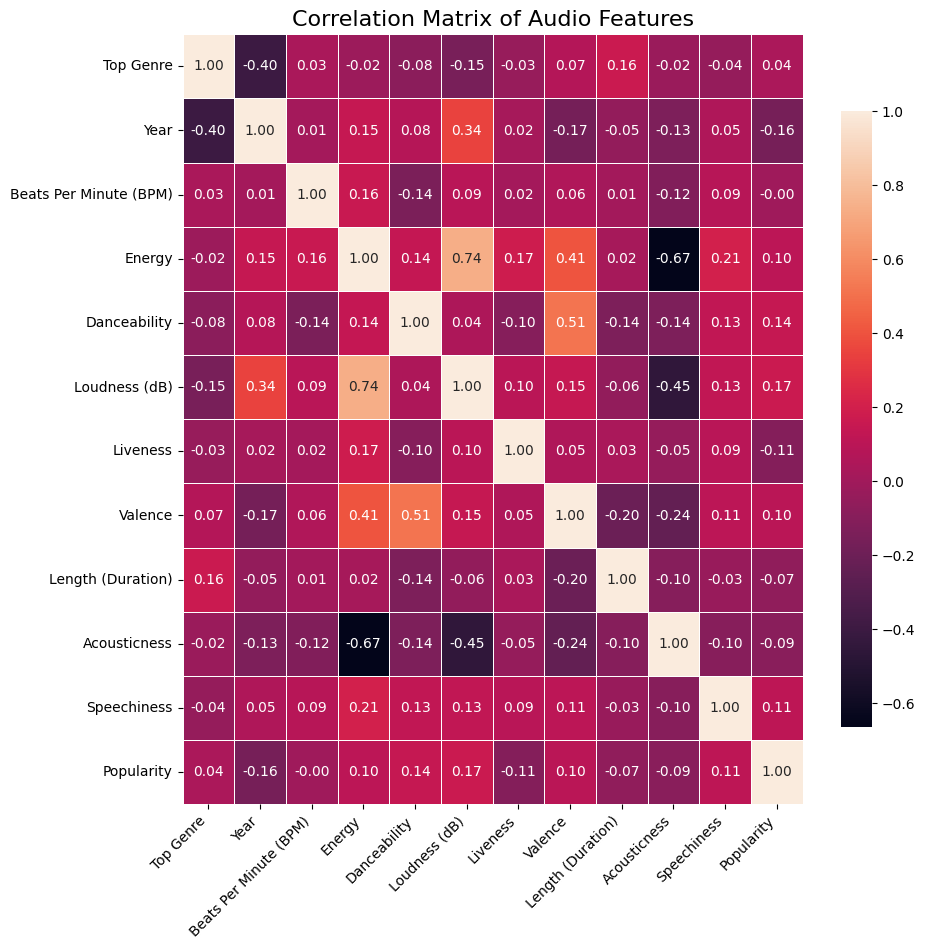

In [11]:
fig, ax = plt.subplots(figsize=(10,10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=0.5, cbar_kws={"shrink": .8}, ax=ax)

# Add titles and labels
plt.title('Correlation Matrix of Audio Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Display the heatmap
plt.show()

In [12]:
numerical_features = ['Beats Per Minute (BPM)',
                      'Energy',
                      'Danceability',
                      'Loudness (dB)', 
                      'Liveness',
                      'Valence',
                      'Length (Duration)',
                      'Acousticness',
                      'Speechiness' ,
                      'Popularity']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the StandardScaler to the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])


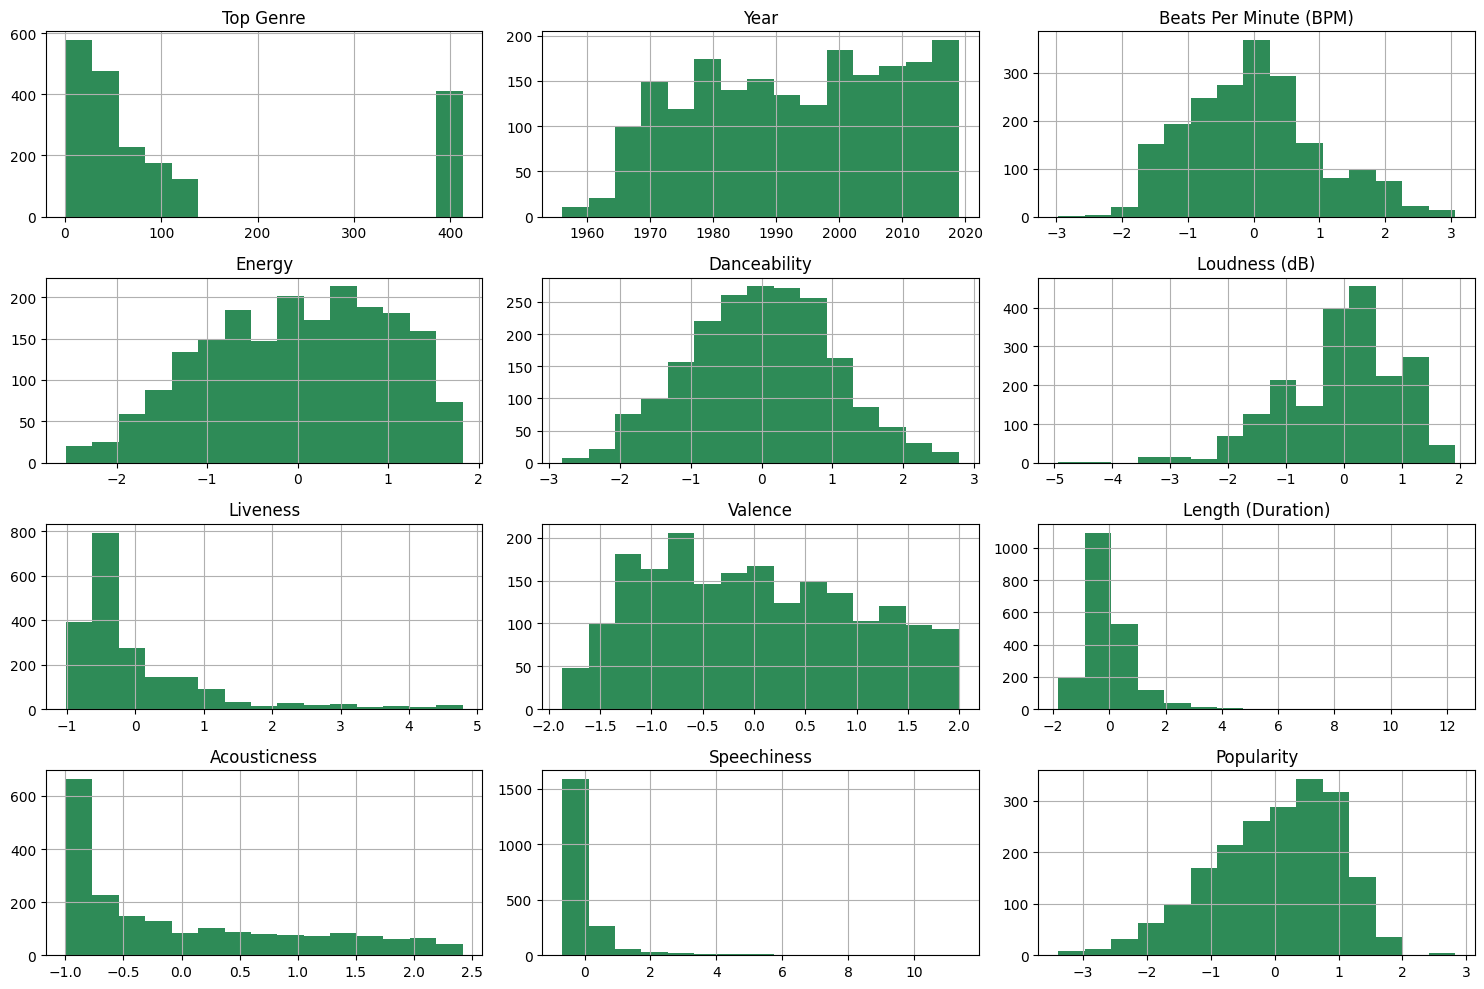

In [13]:
# Create histograms for each numerical feature
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_features].hist(bins=15, figsize=(15, 10), layout=(4, 3) , color = 'seagreen')
plt.tight_layout()
plt.show()

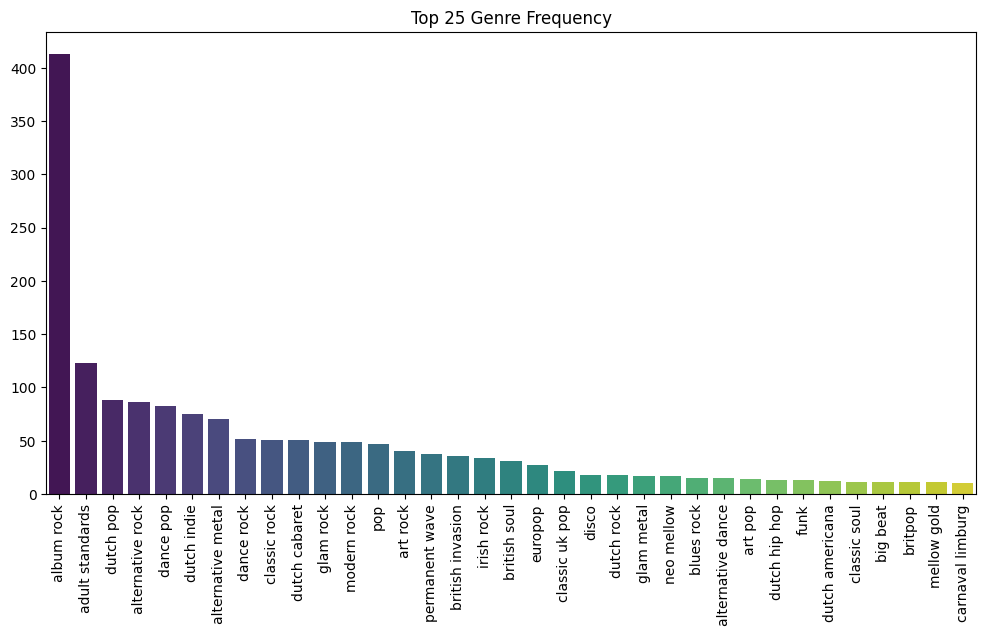

In [14]:
# Graph top 25 genres by frequency
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.head(35).index, y=genre_counts.head(35).values , palette = 'viridis')
plt.title('Top 25 Genre Frequency')
plt.xticks(rotation=90)
plt.show()

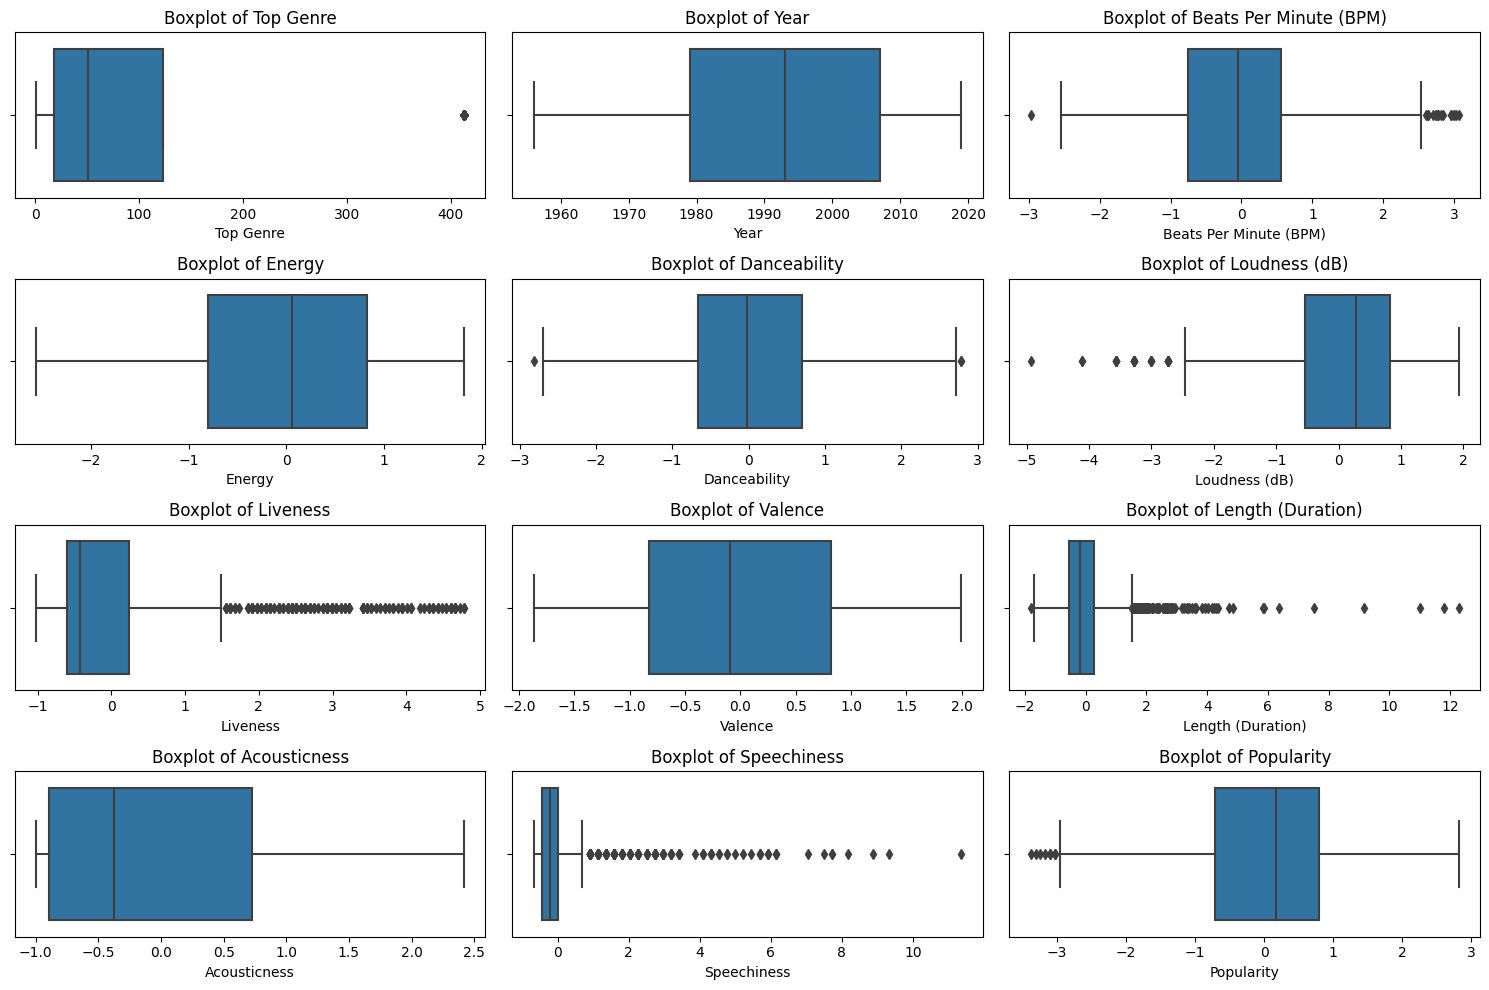

In [15]:
# Create a boxplot plot for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

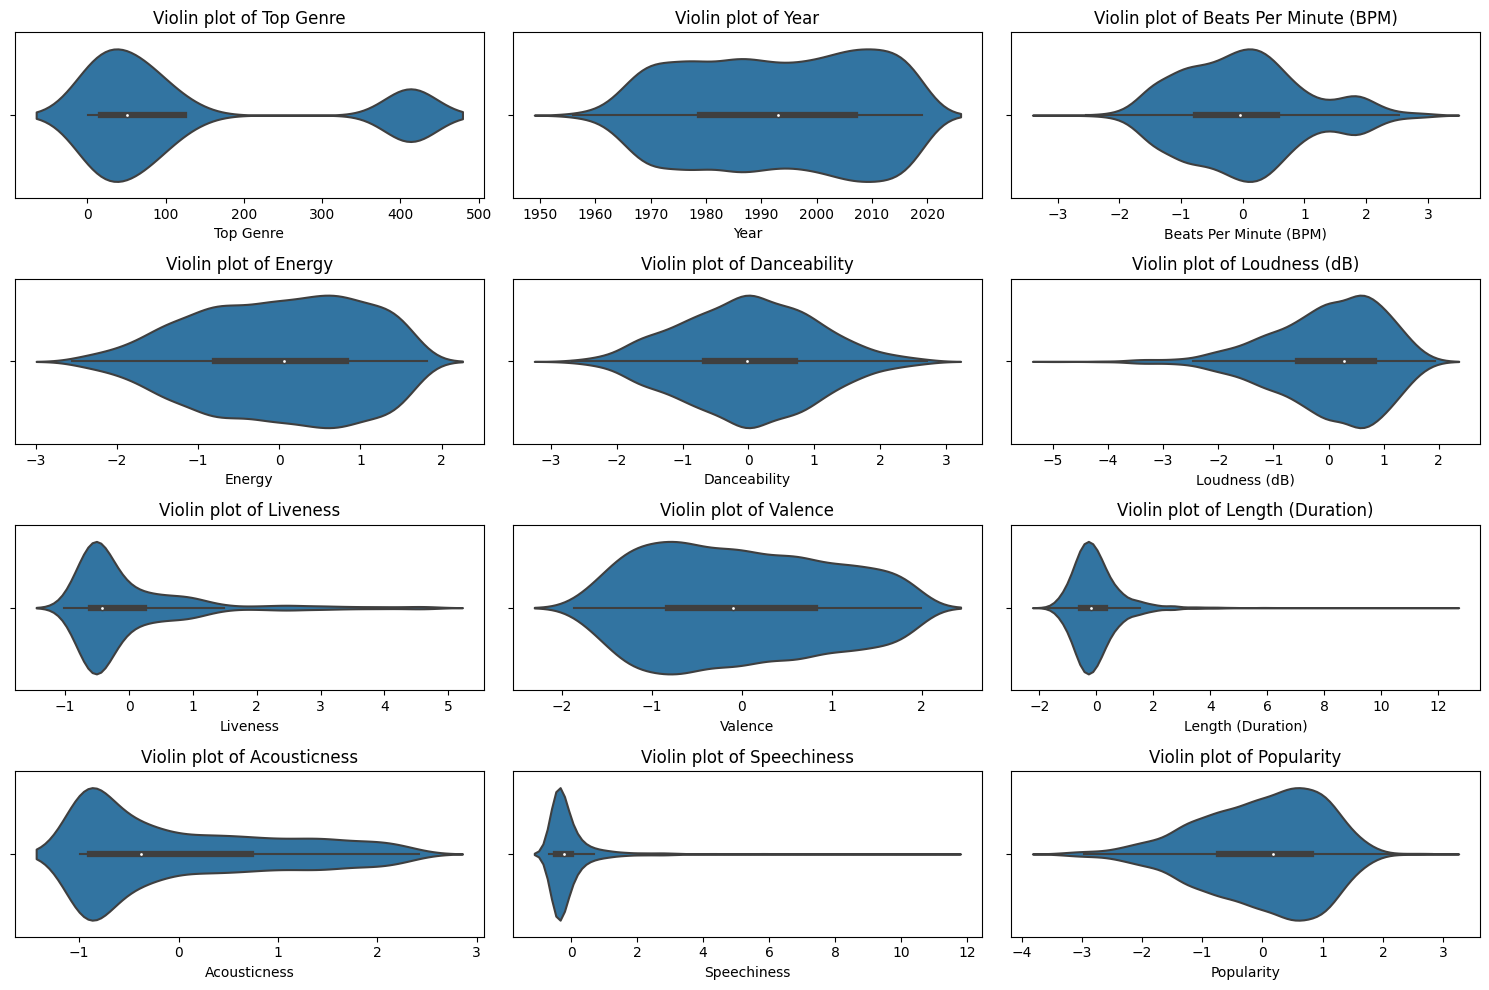

In [16]:
# Create a violin plot for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(4, 3, i+1)
    sns.violinplot(x=df[feature])
    plt.title(f'Violin plot of {feature}')
plt.tight_layout()
plt.show()

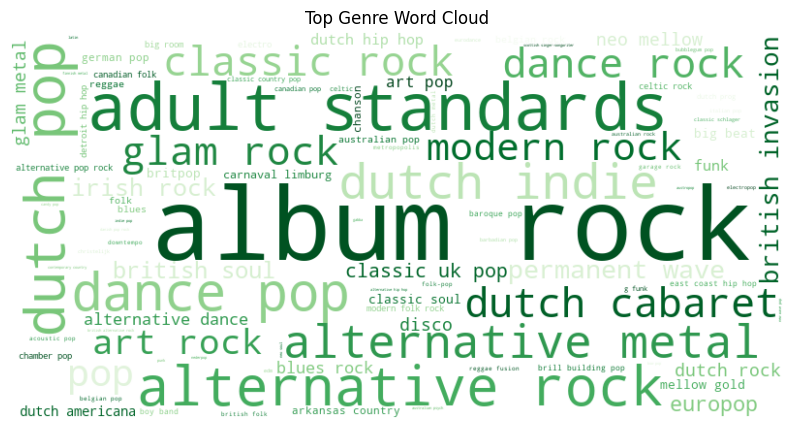

In [22]:
# Create genre wordcloud
stopwords = text.ENGLISH_STOP_WORDS
filtered_genres = genre_counts[~genre_counts.index.isin(stopwords)]


wordcloud = WordCloud(width=800, height=400, background_color='white' , colormap = 'Greens').generate_from_frequencies(filtered_genres)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Genre Word Cloud')
plt.show()

In [26]:
genre_counts1 = df['Top Genre'].astype(str)

# Define standard stopwords
standard_stopwords = text.ENGLISH_STOP_WORDS

# Custom function to identify corpus-specific stopwords
def get_corpus_specific_stopwords(genre_counts1, threshold=0.8):
    vectorizer = TfidfVectorizer(stop_words=standard_stopwords, max_df=threshold)
    X = vectorizer.fit_transform(genre_counts1)
    features = vectorizer.get_feature_names_out()
    return features

# Identify corpus-specific stopwords
corpus_specific_stopwords = get_corpus_specific_stopwords(genre_counts1)

# Combine standard and corpus-specific stopwords
all_stopwords = set(standard_stopwords).union(set(corpus_specific_stopwords))

# Vectorize using TF-IDF with the combined stopwords
vectorizer = TfidfVectorizer(stop_words=all_stopwords)
X = vectorizer.fit_transform(genre_counts1)

# Display the resulting TF-IDF matrix
print(vectorizer.get_feature_names_out())
print(X.toarray())

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [53]:
spotify = df.copy()
spotify.drop(labels=["Top Genre", "Year", "Popularity"], axis=1, inplace=True)

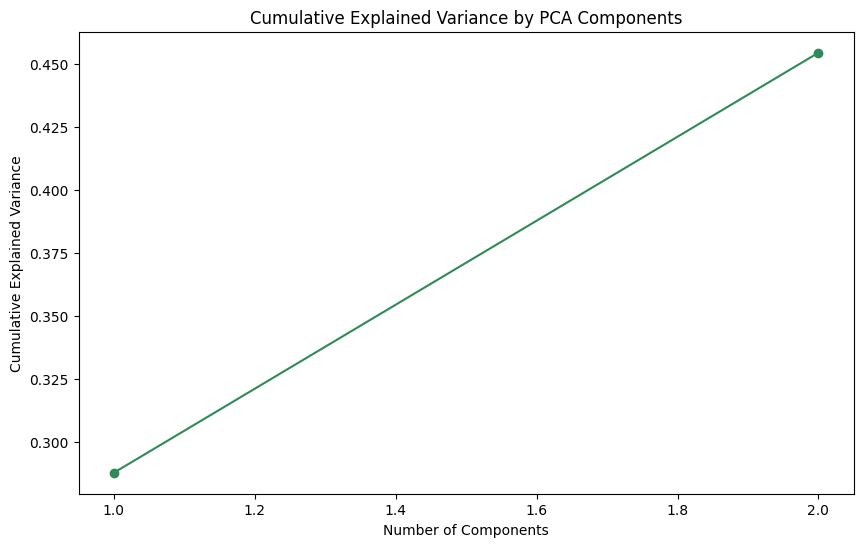

In [80]:
# Standardize the features
scaler = StandardScaler()
scaled_df = scaler.fit_transform(spotify)

# Apply PCA
pca = PCA(n_components=2)  # Adjust the number of components as needed
pca_result = pca.fit_transform(scaled_df)

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o' , color = "seagreen")
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

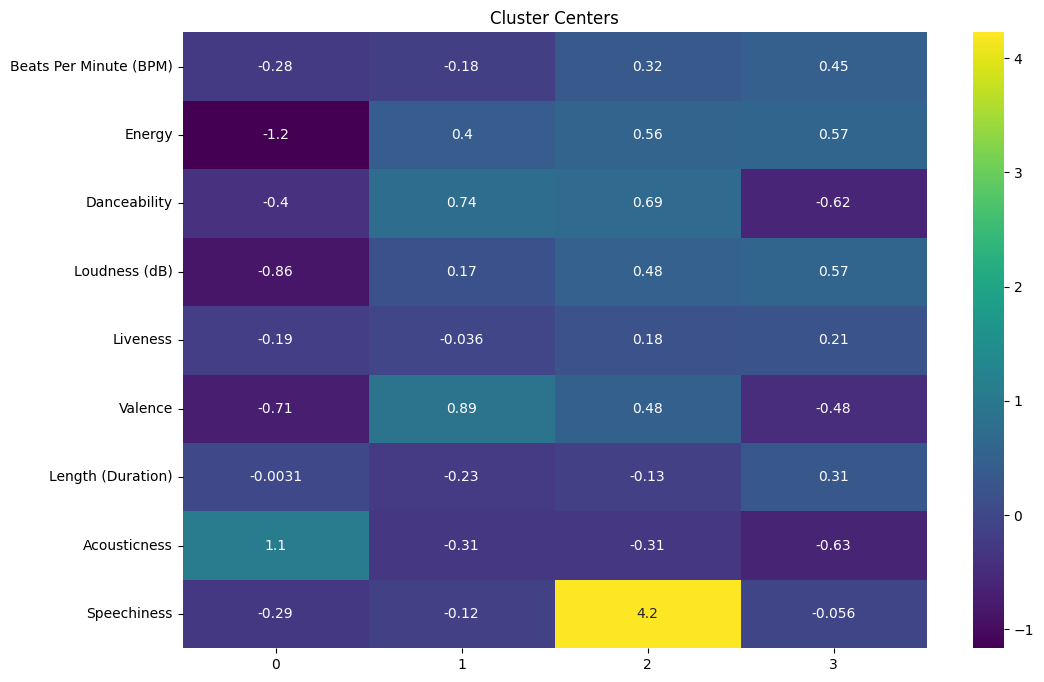

In [69]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_df)

# Create a DataFrame of the cluster centers and plot the cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=spotify.columns)
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_centers.T, annot=True, cmap='viridis')
plt.title('Cluster Centers')
plt.show()